## MATH 152 Lab 5

Put team members' names and section number here.

In [3]:
import sympy as sp
from sympy.plotting import (plot,plot_parametric)
import matplotlib.pyplot as plt

### Question 1

#### 1a

In [4]:
# Enter your code here
a0 = 2029.0
b0 = 2016.0

a_values = [a0]
b_values = [b0]
for _ in range(10):
    a_next = 0.5*(a_values[-1] + b_values[-1])
    b_next = (a_values[-1] * b_values[-1])**0.5
    a_values.append(a_next)
    b_values.append(b_next)

for n in range(1, 11):
    print(f"n={n:2d}  a_n={a_values[n]:.12f}    b_n={b_values[n]:.12f}")


n= 1  a_n=2022.500000000000    b_n=2022.489554979209
n= 2  a_n=2022.494777489605    b_n=2022.494777482862
n= 3  a_n=2022.494777486233    b_n=2022.494777486233
n= 4  a_n=2022.494777486233    b_n=2022.494777486233
n= 5  a_n=2022.494777486233    b_n=2022.494777486233
n= 6  a_n=2022.494777486233    b_n=2022.494777486233
n= 7  a_n=2022.494777486233    b_n=2022.494777486233
n= 8  a_n=2022.494777486233    b_n=2022.494777486233
n= 9  a_n=2022.494777486233    b_n=2022.494777486233
n=10  a_n=2022.494777486233    b_n=2022.494777486233


#### 1b

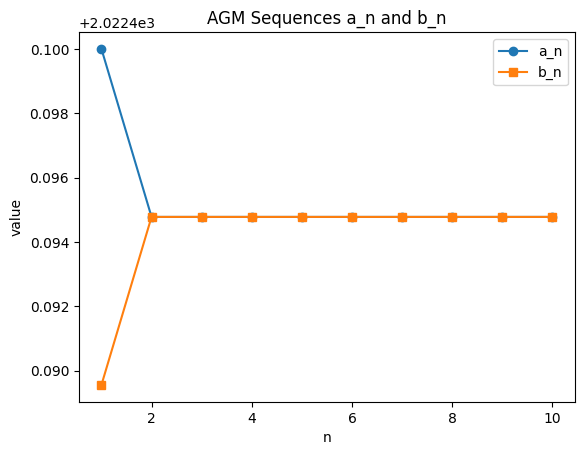

In [5]:
# Enter your code here
# uses the a_vals, b_vals computed above
xs = list(range(1, 11))
plt.figure()
plt.plot(xs, [a_values[n] for n in xs], marker='o', label='a_n')
plt.plot(xs, [b_values[n] for n in xs], marker='s', label='b_n')
plt.xlabel('n')
plt.ylabel('value')
plt.title('AGM Sequences a_n and b_n')
plt.legend()
plt.show()



#### 1c

In [16]:
# Enter your code here
# Define variable and parameters
t = sp.symbols('t', positive=True)
a, b = 2029, 2016

# Define the integrand
expr = 1/sp.sqrt(t * (t + a**2) * (t + b**2))

# Compute improper integral from 0 to ∞
I = sp.integrate(expr, (t, 0, sp.oo))

# Compute AGM from the given formula
AGM = sp.pi / I

print("Integral value I =", I.evalf())
print("AGM via integral =", AGM.evalf())

# Compare to sequence limit
AGM_seq = 0.5*(a_values[-1] + b_values[-1])
print("AGM via sequence =", AGM_seq)



Integral value I = 0.00155332547137377
AGM via integral = 2022.49477748623
AGM via sequence = 2022.494777486233


### Question 2

#### 2a

In [22]:
# Enter your code here
# 2(a) Define a function that takes in a sequence a_n and returns
# L = lim |a_{n+1}/a_n|, estimated numerically.
def ratio_limit(a_n):
    
    start = 1000    
    samples = 50  
    total = 0
    count = 0

    for n in range(start, start + samples):
        an = a_n(n)
        an1 = a_n(n + 1)
        if an != 0:
            total += abs(an1 / an)
            count += 1

    if count == 0:
        return sp.nan
    return sp.N(total / count)



#### 2b

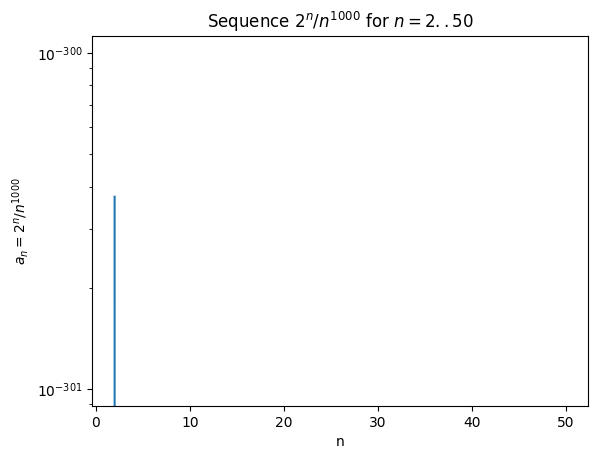

In [27]:
# Enter your code here
# Define the sequence


def a2b(n):
    # compute with exp/log to avoid huge integers and underflow
    n = sp.Integer(n)
    return sp.exp(n*sp.log(2) - 1000*sp.log(n))

xs = list(range(2, 51))        # n = 2..50 is enough to see the curve
ys = [float(a2b(n)) for n in xs]

plt.figure()
plt.plot(xs, ys)
plt.xlabel('n')
plt.ylabel(r'$a_n = 2^n / n^{1000}$')
plt.title(r'Sequence $2^n / n^{1000}$ for $n=2..50$')
plt.yscale('log')
plt.show()



#### 2c

In [ ]:
# Enter your code here
# Reuse your ratio_limit(a_n) function definition from 2(a)

def ratio_limit_for_hard_seq(a_n):
    start = 200_000   # big n so (n/(n+1))^1000 ~ 1
    samples = 50
    total = 0
    count = 0
    for n in range(start, start + samples):
        an  = a_n(n)
        an1 = a_n(n + 1)
        if an != 0:
            total += abs(an1 / an)
            count += 1
    return sp.N(total / count) if count else sp.nan

L_2b = ratio_limit_for_hard_seq(a2b)
print("Estimated L for 2^n / n^1000 =", L_2b)

if L_2b > 1:
    print("Conclusion: L > 1 → Diverges (|a_n| → ∞).")
elif L_2b < 1:
    print("Conclusion: L < 1 → Converges to 0.")
else:
    print("Ratio test inconclusive (L = 1).")

# Analytic check (instant and exact for reporting):
n = sp.symbols('n', positive=True, integer=True)
print("Analytic limit =", sp.limit(2*(n/(n+1))**1000, n, sp.oo))  # -> 2



Estimated L for 2^n / n^1000 = 1.99002620194423
Conclusion: L > 1 → Diverges (|a_n| → ∞).
Analytic limit = 2


#### 2d

In [ ]:
# Enter your code here
def a2d(n):
    return sp.Pow(4, n) / sp.sqrt(sp.factorial(n))

L_2d = ratio_limit(a2d)
print("Estimated L for 4^n / sqrt(n!) =", L_2d)

if L_2d > 1:
    print("Conclusion: L > 1 → Diverges.")
elif L_2d < 1:
    print("Conclusion: L < 1 → Converges to 0.")
else:
    print("Ratio test inconclusive (L = 1).")



Estimated L for 4^n / sqrt(n!) = 0.124917825631384
Conclusion: L < 1 → Converges to 0.


### Question 3

#### 3a

In [31]:
# Enter your code here
# 3(a) — Claim is FALSE
# Claim: If lim_{n→∞}((-1)^n / a_n) = L, then L = 0.
# Counterexample: a_n = (-1)^n  →  (-1)^n / a_n = 1 → L = 1 ≠ 0.

import sympy as sp
n = sp.symbols('n', integer=True, positive=True)

a_n = (-1)**n
expr = (-1)**n / a_n

print("3(a): (-1)^n / a_n simplifies to:", sp.simplify(expr))
print("Limit as n→∞:", sp.limit(expr, n, sp.oo))
print("Conclusion: L = 1 ≠ 0 → claim is FALSE.")



3(a): (-1)^n / a_n simplifies to: 1
Limit as n→∞: 1
Conclusion: L = 1 ≠ 0 → claim is FALSE.


#### 3b


In [32]:
# Enter your code here
# 3(b) — Claim is FALSE
# Claim: If both a_n and b_n do not converge, then a_n*b_n cannot converge.
# Counterexample: a_n = b_n = (-1)^n → a_n*b_n = 1 → convergent.

import sympy as sp
n = sp.symbols('n', integer=True, positive=True)

a_n = (-1)**n
b_n = (-1)**n
prod = sp.simplify(a_n * b_n)

print("3(b): a_n * b_n simplifies to:", prod)
print("Limit as n→∞:", sp.limit(prod, n, sp.oo))
print("Conclusion: product converges to 1 → claim is FALSE.")



3(b): a_n * b_n simplifies to: 1
Limit as n→∞: 1
Conclusion: product converges to 1 → claim is FALSE.


#### 3c


In [33]:
# Enter your code here
# 3(c) — Claim is FALSE
# Claim: If a_n does not converge, then a_n^c can only converge if c=0.
# Counterexample: a_n = (-1)^n, c = 2 → a_n^2 = 1 → convergent.

import sympy as sp
n = sp.symbols('n', integer=True, positive=True)

a_n = (-1)**n
c = 2
seq = sp.simplify(a_n**c)

print("3(c): a_n^2 simplifies to:", seq)
print("Limit as n→∞:", sp.limit(seq, n, sp.oo))
print("Conclusion: a_n^2 converges to 1 even though a_n does not → claim is FALSE.")



3(c): a_n^2 simplifies to: 1
Limit as n→∞: 1
Conclusion: a_n^2 converges to 1 even though a_n does not → claim is FALSE.


#### 3d


3(d): first 20 terms: [0.5, 2.5, 2.5, 4.5, 4.5, 6.5, 6.5, 8.5, 8.5, 10.5, 10.5, 12.5, 12.5, 14.5, 14.5, 16.5, 16.5, 18.5, 18.5, 20.5]
Decreases (where a_{n+1} < a_n): []
Conclusion: sequence → ∞ but not strictly increasing → claim is FALSE.


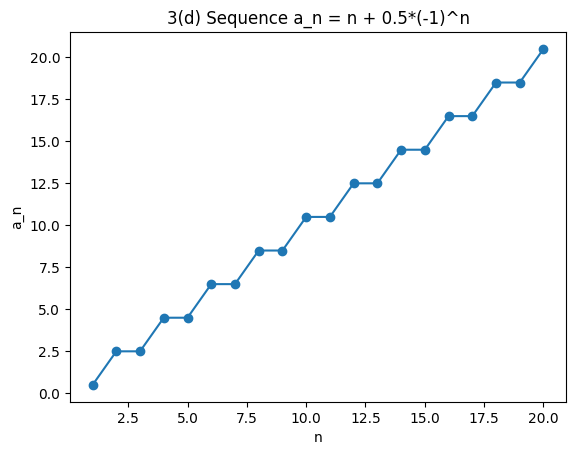

In [ ]:
# Enter your code here
# 3(d) — Claim is FALSE
# Claim: If a_n → ∞, then there exists N such that for all n > N, a_n is strictly increasing.
# Counterexample: a_n = n + 0.5*(-1)^n → diverges to ∞ but oscillates forever.

import matplotlib.pyplot as plt

def a_d(k):
    return float(k + 0.5*((-1)**k))

vals = [a_d(k) for k in range(1, 21)]
decreases = [(k, vals[k-1], vals[k]) for k in range(1, len(vals)) if vals[k] < vals[k-1]]

print("3(d): first 20 terms:", [round(v,3) for v in vals])
print("Decreases (where a_{n+1} < a_n):", decreases[:5])
print("Conclusion: sequence → ∞ but not strictly increasing → claim is FALSE.")

plt.plot(range(1,21), vals, marker='o')
plt.title("3(d) Sequence a_n = n + 0.5*(-1)^n")
plt.xlabel("n"); plt.ylabel("a_n"); plt.show()



#### 3e


In [35]:
# Enter your code here
# 3(e) — Claim is FALSE
# Claim: If (e_n / a_n) → 0, then (e_{2n} / a_n) also converges.
# Counterexample:
#   a_n = n (even n), 1/n (odd n)
#   e_n = 1 (even n), 0 (odd n)
# Then e_n/a_n → 0 but e_{2n}/a_n oscillates → no limit.

def a_e(k):
    return k if (k % 2 == 0) else 1/k

def e_e(k):
    return 1 if (k % 2 == 0) else 0

rat_en_an = [e_e(k)/a_e(k) for k in range(2, 22)]
even_ns = [2,4,6,8,10]
odd_ns  = [3,5,7,9,11]

vals_even = [(n, e_e(2*n)/a_e(n)) for n in even_ns]
vals_odd  = [(n, e_e(2*n)/a_e(n)) for n in odd_ns]

print("3(e): e_n/a_n (first 20):", rat_en_an)
print("e_{2n}/a_n on even n (→0):", vals_even)
print("e_{2n}/a_n on odd  n (→∞):", vals_odd)
print("Conclusion: e_n/a_n → 0 but e_{2n}/a_n diverges → claim is FALSE.")



3(e): e_n/a_n (first 20): [0.5, 0.0, 0.25, 0.0, 0.16666666666666666, 0.0, 0.125, 0.0, 0.1, 0.0, 0.08333333333333333, 0.0, 0.07142857142857142, 0.0, 0.0625, 0.0, 0.05555555555555555, 0.0, 0.05, 0.0]
e_{2n}/a_n on even n (→0): [(2, 0.5), (4, 0.25), (6, 0.16666666666666666), (8, 0.125), (10, 0.1)]
e_{2n}/a_n on odd  n (→∞): [(3, 3.0), (5, 5.0), (7, 7.0), (9, 9.0), (11, 11.0)]
Conclusion: e_n/a_n → 0 but e_{2n}/a_n diverges → claim is FALSE.
